In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib import font_manager
import matplotlib

In [4]:
font_loc = 'C:\\Windows\\Fonts\\malgunbd.ttf' # 한글 폰트 지정
font_name = font_manager.FontProperties(fname=font_loc).get_name() # 폰트 이름 가져오기
matplotlib.rc('font', family=font_name) # 기본폰트를 한글폰트로 지정
matplotlib.rcParams['axes.unicode_minus'] = False 

In [ ]:
file_path = './input/fine_dust.xlsx' 
df = pd.read_excel(file_path, header=None)

df = df.set_index(df.columns[0])

columns = list(range(2001, 2024))
df.columns = columns

df.index.name = '지역'

df

In [6]:
df = df.replace('-', '0')

for year in range(2001, 2024):
    df[year] = df[year].apply(lambda x: str(x)[:2]).astype(int)

df

,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
지역,,,,,,,,,,,,,,,,,,,,,
서울,71,76,69,61,58,60,61,55,54,49,...,46,45,48,44,40,42,35,38,33,38
부산,60,69,55,60,58,59,57,51,49,49,...,48,46,44,44,41,36,30,32,27,31
대구,67,71,59,0,55,54,53,57,48,51,...,45,46,43,42,39,39,34,35,30,35
인천,52,57,61,62,61,68,64,57,60,55,...,49,53,49,46,40,43,34,39,33,41
광주,57,52,36,46,49,55,52,50,46,45,...,41,43,40,40,41,42,30,34,28,33
대전,48,53,43,49,48,49,49,45,43,44,...,41,46,44,45,44,42,33,36,31,36
울산,0,54,40,50,50,52,53,54,49,48,...,46,46,43,43,40,37,30,30,29,35
세종,0,0,0,0,0,0,0,0,0,0,...,0,0,46,47,40,44,36,39,34,38
경기,71,74,68,67,65,68,66,60,60,58,...,54,53,53,51,44,46,39,42,35,41


In [7]:
# 지역별(서울, 부산, 대구, 인천) 2019년 ~ 2022년 그룹 세로 막대그래프
index = np.arange(4) # 0 ~ 4
data = df.loc['서울':'인천', 2019:2022] 
data

,2019,2020,2021,2022
지역,,,,
서울,42,35,38,33
부산,36,30,32,27
대구,39,34,35,30
인천,43,34,39,33


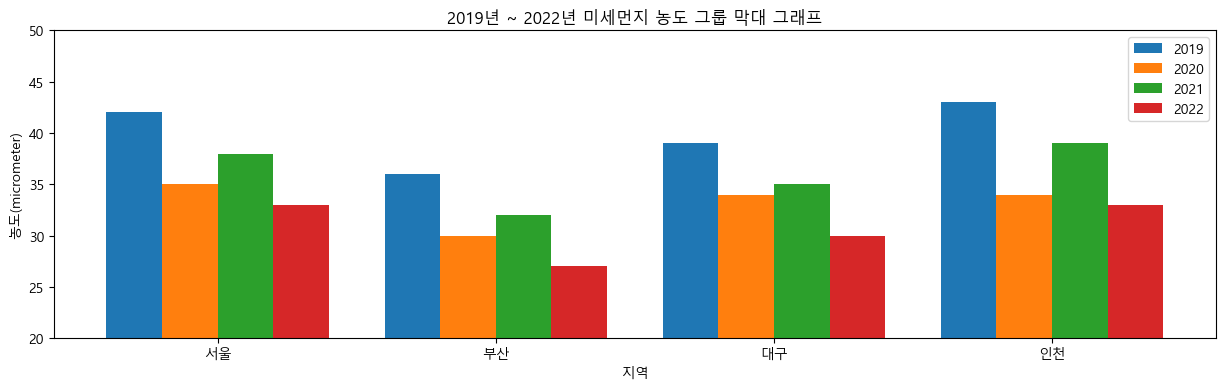

In [ ]:
plt.figure(figsize=(15, 4))
for year in range(2019, 2023):
    chart_data = data[year] # 2019의 서울, 부산, 대구, 인천 데이터 읽고 2020, 2021, 2022의 데이터 읽기
    plt.bar(index, chart_data, width=0.2, label=str(year))
    index = index + 0.2  # 출력되는 위치를 0.2씩 이동(width = 0.2로 지정했기 때문)
    # index + 0.1로 실행시 데이터 부분 합쳐짐
    # index 실행X -> 누적으로 생김(index가 이동하질 않기 때문)

plt.title('2019년 ~ 2022년 미세먼지 농도 그룹 막대 그래프')
plt.xlabel('지역')
plt.ylabel('농도(micrometer)')
plt.ylim(20, 50)
plt.xticks(index-0.5, ['서울', '부산', '대구', '인천'])
plt.legend()
plt.show()

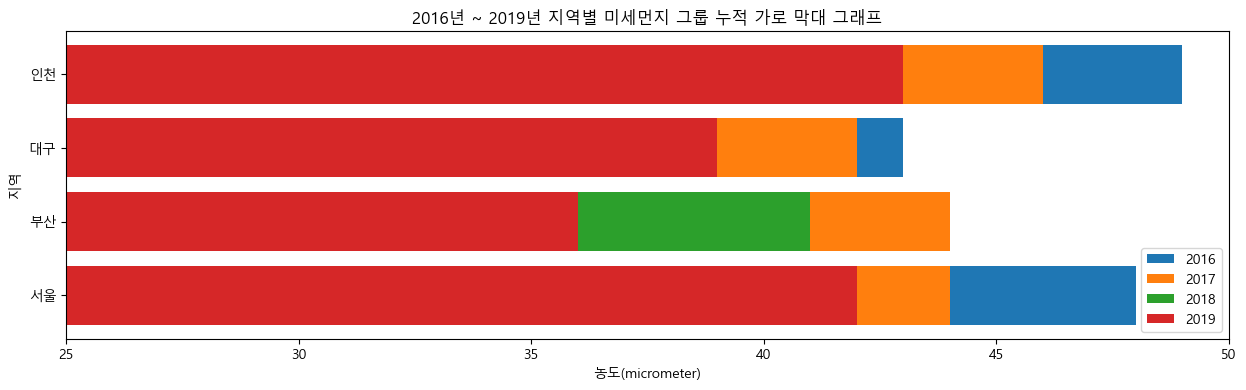

In [16]:
# 지역별 2016년 ~ 2019년 미세먼지 그룹 누적 가로 막대 그래프
plt.figure(figsize=(15,4))
data2 = df.loc['서울':'인천', 2016:2019]
for year in range(2016, 2020):
    chart_data2 = data2[year]
    plt.barh(index, chart_data2, label = str(year))
plt.title('2016년 ~ 2019년 지역별 미세먼지 그룹 누적 가로 막대 그래프')
plt.xlabel('농도(micrometer)')
plt.ylabel('지역')
plt.xlim(25, 50)
plt.yticks(index, ['서울', '부산', '대구', '인천'])
plt.legend()
plt.show()

In [17]:
# 산점도 실습 - 우리나라 주요 도시의 인구 밀도 시각화
city = ['서울', '인천', '대전', '대구', '울산', '부산', '광주']

# 위도(latitude)와 경도(longitude)
lat  = [37.56, 37.45, 36.35, 35.87, 35.53, 35.18, 35.16]
lon = [126.97, 126.70, 127.38, 128.60, 129.31, 129.07, 126.85]

# 인구 밀도(명/km^2): 2017년 통계청 자료
pop_den = [16154, 2751, 2839, 2790, 1099, 4454, 2995]

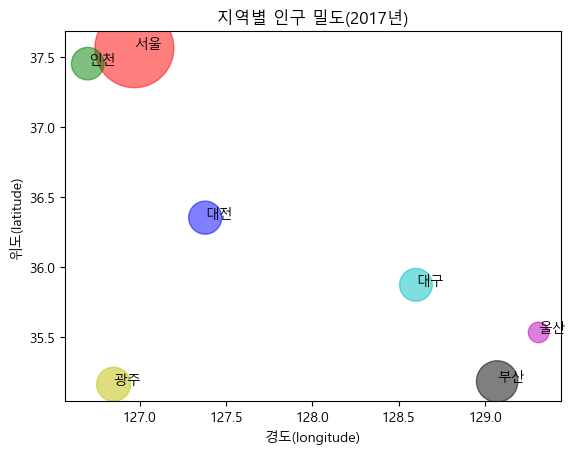

In [ ]:
# 마커의 크기를 인구밀도와 비례하도록 설정
size = np.array(pop_den) * 0.2

# 도시별로 컬러를 다르게 지정
colors = ['r', 'g', 'b', 'c', 'm', 'k', 'y']

plt.scatter(lon, lat, s=size, c=colors, alpha=0.5) # x축 -> lon(경도), y축 -> lat(위도), alpha : 투명도(0 ~ 1(원상태, 가장 진함))
plt.xlabel('경도(longitude)')
plt.ylabel('위도(latitude)')
plt.title('지역별 인구 밀도(2017년)')

# 마커가 위치한 곳에 도시의 이름을 표시
for x, y, name in zip(lon, lat, city): # zip() : 튜플로 묶어줌(같은 인덱스번호끼리)
    plt.text(x, y, name) # 위도, 경도에 맞게 도시이름을 출력(x, y위치에 name)

plt.show()

In [20]:
# 산점도 실습 - 공공데이터포털 2023년 건강검진
data = pd.read_csv('./input/국민건강보험공단_건강검진정보_2023.CSV', encoding='cp949')
data.head()

,기준년도,가입자일련번호,시도코드,성별코드,연령대코드(5세단위),신장(5cm단위),체중(5kg단위),허리둘레,시력(좌),시력(우),...,혈청지피티(ALT),감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,결손치 유무,치아마모증유무,제3대구치(사랑니) 이상,치석
0,2023,34735,46,2,9,155,70,92.0,1.2,1.2,...,24.0,50.0,1.0,1.0,0,NaN,NaN,NaN,NaN,NaN
1,2023,4105118,11,1,17,160,55,86.0,0.9,9.9,...,11.0,31.0,1.0,1.0,0,NaN,NaN,NaN,NaN,NaN
2,2023,362482,36,2,13,150,65,96.0,1.0,0.8,...,29.0,24.0,1.0,1.0,0,NaN,NaN,NaN,NaN,NaN
3,2023,653166,11,1,13,160,70,85.0,1.0,1.2,...,21.0,27.0,3.0,1.0,1,0.0,NaN,NaN,NaN,0.0
4,2023,4152237,41,1,12,165,65,84.5,1.0,1.2,...,33.0,49.0,3.0,1.0,0,NaN,NaN,NaN,NaN,NaN


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 33 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   기준년도           1000000 non-null  int64  
 1   가입자일련번호        1000000 non-null  int64  
 2   시도코드           1000000 non-null  int64  
 3   성별코드           1000000 non-null  int64  
 4   연령대코드(5세단위)    1000000 non-null  int64  
 5   신장(5cm단위)      1000000 non-null  int64  
 6   체중(5kg단위)      1000000 non-null  int64  
 7   허리둘레           999589 non-null   float64
 8   시력(좌)          999816 non-null   float64
 9   시력(우)          999823 non-null   float64
 10  청력(좌)          999863 non-null   float64
 11  청력(우)          999862 non-null   float64
 12  수축기혈압          994253 non-null   float64
 13  이완기혈압          994253 non-null   float64
 14  식전혈당(공복혈당)     994186 non-null   float64
 15  총콜레스테롤         338606 non-null   float64
 16  트리글리세라이드       338606 non-null   float64
 17  HDL콜레스테롤 

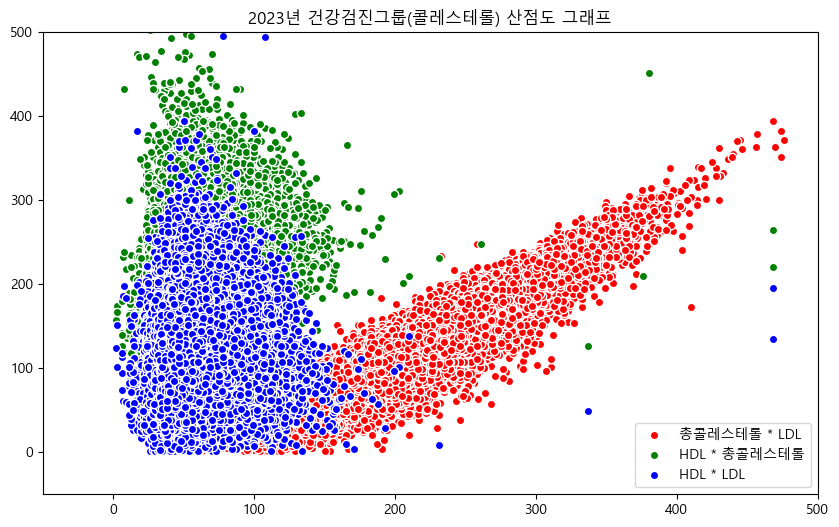

In [ ]:
HDL_data = data['HDL콜레스테롤'] # 좋은 콜레스테롤(60이상) 수치가 높을수록 좋음
LDL_data = data['LDL콜레스테롤'] # 나쁜 콜레스테롤(130미만) 수치가 낮을수록 좋음
total_chol = data['총콜레스테롤'] # (200미만)-정상수치

plt.figure(figsize=(10,6))

plt.scatter(total_chol, LDL_data, color='r', edgecolors='w', label='총콜레스테롤 * LDL') # edgecolor : 마커테두리 색깔 지정
plt.scatter(HDL_data, total_chol, color='g', edgecolors='w', label='HDL * 총콜레스테롤')
plt.scatter(HDL_data, LDL_data, color='b', edgecolors='w', label='HDL * LDL')
plt.title('2023년 건강검진그룹(콜레스테롤) 산점도 그래프')
plt.xlim(-50, 500)
plt.ylim(-50, 500)
plt.legend(loc='lower right') # 오른쪽 아래 범례 위치 설정
plt.show()

In [23]:
# 캐글 -> penguins_size.csv 파일 다운로드 받아 실습
# 어떤 종류의 펭귄일까?

import pandas as pd
df = pd.read_csv('./input/penguins_size.csv')
df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [24]:
# 데이터 기초정보 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [ ]:
# 데이터 통계량
df.describe(include='all').T # T(행렬전치 -> 보기 편하게)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
species,344,3,Adelie,152,NaN,NaN,NaN,NaN,NaN,NaN,NaN
island,344,3,Biscoe,168,NaN,NaN,NaN,NaN,NaN,NaN,NaN
culmen_length_mm,342.0,NaN,NaN,NaN,43.92193,5.459584,32.1,39.225,44.45,48.5,59.6
culmen_depth_mm,342.0,NaN,NaN,NaN,17.15117,1.974793,13.1,15.6,17.3,18.7,21.5
flipper_length_mm,342.0,NaN,NaN,NaN,200.915205,14.061714,172.0,190.0,197.0,213.0,231.0
body_mass_g,342.0,NaN,NaN,NaN,4201.754386,801.954536,2700.0,3550.0,4050.0,4750.0,6300.0
sex,334,3,MALE,168,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# 성별 unique가 3이므로 성별 속성의 고유한 값을 확인
df['sex'].unique() # 'male, female, .'확인완료

array(['MALE', 'FEMALE', nan, '.'], dtype=object)

In [27]:
# 마침표(.)가 있는 행 확인
df[df['sex'] == '.'] 

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,.


In [ ]:
# 성별에 마침효가 있는 336번째행을 삭제 -> drop() -> 다시 확인
df = df.drop(336)
df['sex'].unique()

array(['MALE', 'FEMALE', nan], dtype=object)

In [29]:
# 결측치 개수 확인
df.isna().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [ ]:
# 결측치 처리
# 수치형 데이터는 평균으로 -> fillna(), 범주형 데이터인 성별은 삭제 -> dropna()
# drop() : 데이터프레임에서 행 또는 열을 직접적으로 삭제
# dropna() : 데이터프레임에서 결측치 값을 가지는 행 또는 열 삭제

df['culmen_length_mm'] = df['culmen_length_mm'].fillna(df['culmen_length_mm'].mean())
df['culmen_depth_mm'] = df['culmen_depth_mm'].fillna(df['culmen_depth_mm'].mean())
df['flipper_length_mm'] = df['flipper_length_mm'].fillna(df['flipper_length_mm'].mean())
df['body_mass_g'] = df['body_mass_g'].fillna(df['body_mass_g'].mean())

df = df.dropna() # 성별의 결측치 10개를 삭제
df.isna().sum() 

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

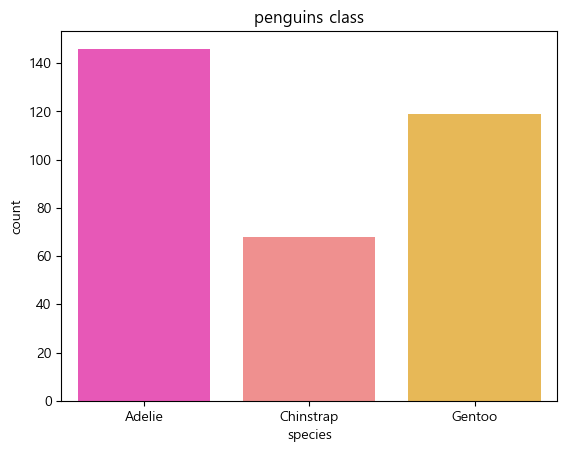

In [ ]:
# 데이터 시각화
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='species', data=df, palette='spring', hue='species')
plt.title('penguins class') 
plt.show()